In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets

# Cofiguraciones
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,10)

Para este ejemplo vamos a utilizar el Wisconsin Breast Cancer Dataset). Es un dataset de imagenes de celulas obtenidas de analisis de personas que sufren un posible cancer de mama.

Las imagenes tienen el siguiente aspecto:

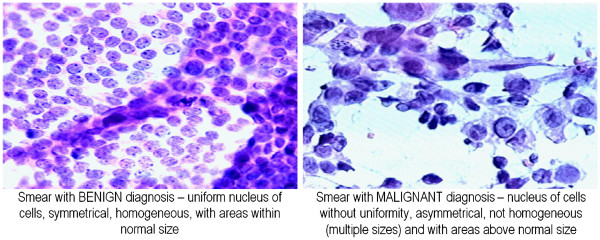

In [3]:
from IPython.display import Image

Image("./img/breast_cancer.jpeg")

# Carga del dataset

In [5]:
cancer_datos = datasets.load_breast_cancer()
cancer_datos.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

- "data" se encuentra todos los datos del dataset.
- "feature_names" encontramos los nombres de las columnas.
- "DESCR" una descripción del dataset. 
- "target" valores de la variable objetivo.
- "target_names" clasificación de la variable objetivo

In [6]:
cancer_df = pd.DataFrame(cancer_datos.data, columns=cancer_datos.feature_names)
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Definimos una nueva columna, la cual es la variable objetivo, en "target" encontramos dichos valores.

In [8]:
cancer_df["objetivo"] = cancer_datos.target
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,objetivo
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


Un 0 en la variable objetivo significa que el cáncer es maligno y por contra un 1 que es benigno.

# Modelando el problema con regresión lineal

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [11]:
train_df, test_df = train_test_split(cancer_df, test_size=0.4)

variables_entrenamiento = cancer_datos["feature_names"]
variable_objetivo = "objetivo"

Vamos a suponer que la regresión lineal lo hacemos a partir del estudio del campo "worst area", es decir, el cómo afecta dicho campo para saber si un tumor en benigno o maligno

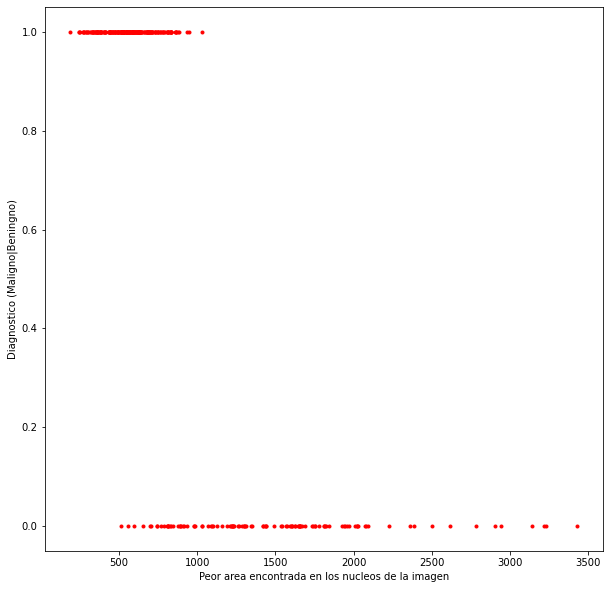

In [22]:
columna_entranamiento = "worst area"

plt.plot(train_df[columna_entranamiento], train_df[variable_objetivo], '.r')
plt.xlabel("Peor area encontrada en los nucleos de la imagen")
plt.ylabel("Diagnostico (Maligno|Beningno)");

Como podemos observar, a mayor área más riesgo de que sea un cáncer maligno, recordando que 0 es maligano y 1 benigno. También podemos ver que los datos van entre 0 y 1, podría darse el caso que al hacer una regresión logística los valores sean entre 0 y 1 ambos incluidos, en ese caso tendríamos que usar un criterio para poder clasificar de forma binaria.

In [33]:
modelo_ols = LinearRegression()

modelo_ols.fit(train_df[[columna_entranamiento]],
               train_df[variable_objetivo])

predicciones = modelo_ols.predict(test_df[[columna_entranamiento]])

predicciones

array([ 0.98696137,  0.69999963,  0.56700838,  0.18300229,  0.71165477,
        0.92660003,  0.39034105,  0.90519138,  1.02517795,  0.67552384,
        0.90715435,  0.21183342,  0.75680309,  0.9858572 ,  0.44923016,
        0.34678764,  0.6741743 ,  0.65092537,  0.02167066, -0.26664062,
        0.96543004,  0.75747786,  0.89727816,  0.80189007,  0.56332781,
        0.39708876,  0.92114052,  0.87163686,  0.51977441,  0.93776442,
        0.45536444,  0.91537429,  0.05847636,  0.75011672,  0.91519026,
        0.25722711,  0.61050045,  0.45352416,  0.70049037,  0.16705316,
        1.03879606,  0.17625458,  0.77103462,  0.41487818,  0.93991142,
        0.78483676,  0.74159007,  0.71693025,  0.90825853,  0.37377848,
        0.80440512,  0.76588183,  0.79495833,  0.48664928,  0.74729495,
        0.85489027,  0.29648652,  0.63098895,  0.26581511,  0.65129343,
        0.88740196,  0.872557  ,  0.98272872,  0.77459251,  0.71073463,
        0.22410199,  0.54247125,  0.87243432,  0.40076933,  0.78

Text(0, 0.5, 'Diagnostico (Maligno|Beningno)')

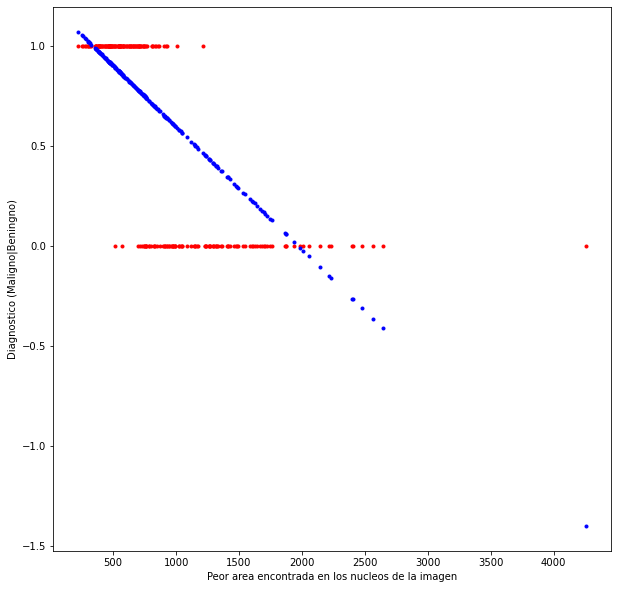

In [35]:
plt.plot(test_df[columna_entranamiento], test_df.objetivo, '.r')
plt.plot(test_df[columna_entranamiento], predicciones, '.b')
plt.xlabel("Peor area encontrada en los nucleos de la imagen")
plt.ylabel("Diagnostico (Maligno|Beningno)")

# Función logística a mano

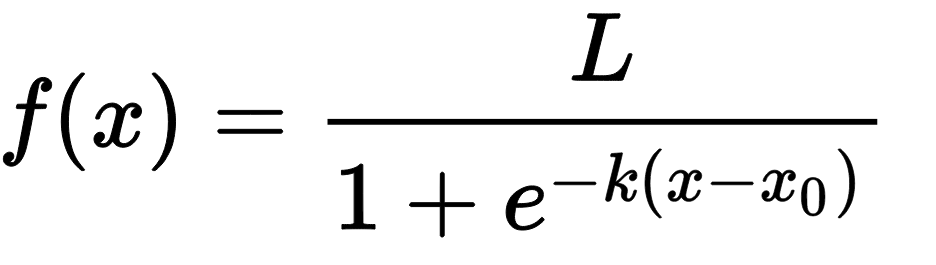

In [36]:
Image("./img/funcion_logistica.png")

In [38]:
from ipywidgets import interact

def funcion_logistica(x, L=1, k=1, x0=0):
    return L / (1 + np.exp(-k*(x-x0)))


@interact(L=range(1,10), k=range(-5, 5), x0=range(-10,10))
def plot_funcion_logit(L, k, x0):
    x = np.linspace(-5*k, 5*k, 500)
    y = funcion_logistica(x, k=k, L=L, x0=x0)
    plt.figure(1)
    plt.plot(x, y)
    plt.show()

interactive(children=(Dropdown(description='L', options=(1, 2, 3, 4, 5, 6, 7, 8, 9), value=1), Dropdown(descri…

In [44]:
predicciones_probabilidades = list(map(funcion_logistica, predicciones))

Text(0, 0.5, 'Diagnostico (Maligno|Beningno)')

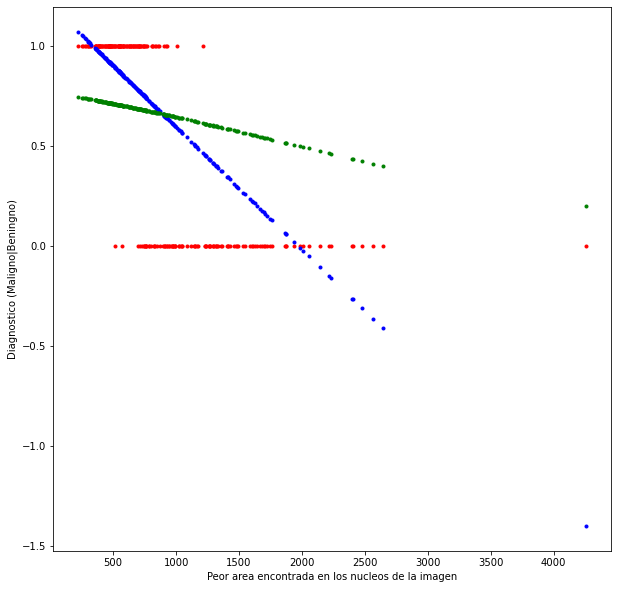

In [45]:
plt.plot(test_df[columna_entranamiento], test_df.objetivo, '.r')
plt.plot(test_df[columna_entranamiento], predicciones, '.b')
plt.plot(test_df[columna_entranamiento], predicciones_probabilidades,'.g')

plt.xlabel("Peor area encontrada en los nucleos de la imagen")
plt.ylabel("Diagnostico (Maligno|Beningno)")

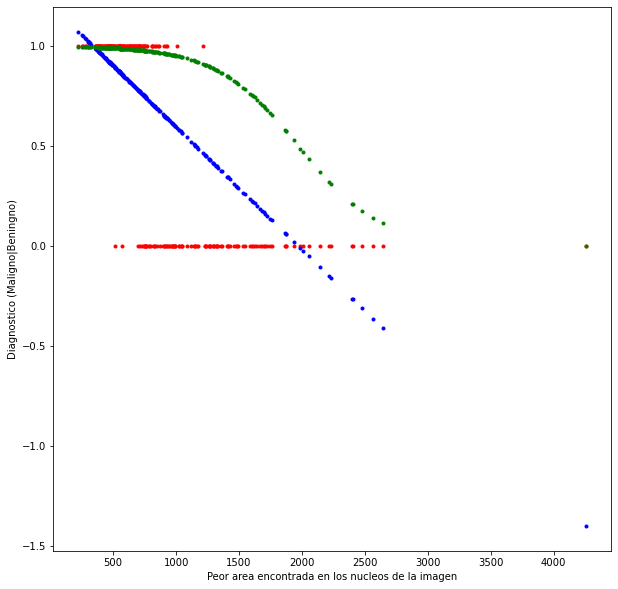

In [46]:
from functools import partial

funcion_logit_k5 = partial(funcion_logistica, k=5)

predicciones_probabilidades = list(map(funcion_logit_k5, predicciones))

plt.plot(test_df[columna_entranamiento], test_df.objetivo, '.r')
plt.plot(test_df[columna_entranamiento], predicciones, '.b')
plt.plot(test_df[columna_entranamiento], predicciones_probabilidades,'.g')

plt.xlabel("Peor area encontrada en los nucleos de la imagen")
plt.ylabel("Diagnostico (Maligno|Beningno)");

# Regresión logística sklearn

In [47]:
from sklearn.linear_model import LogisticRegression

In [48]:
X = cancer_df[variables_entrenamiento]
y = cancer_df[variable_objetivo]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [50]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
predicciones = clf.predict(X_test)

predicciones

C:\Users\mario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1])

In [52]:
predicciones_probabilidades = clf.predict_proba(X_test)
predicciones_probabilidades

array([[9.99999608e-01, 3.91575685e-07],
       [9.99998728e-01, 1.27151130e-06],
       [1.86467453e-03, 9.98135325e-01],
       [1.65074188e-02, 9.83492581e-01],
       [6.47893168e-04, 9.99352107e-01],
       [9.99999991e-01, 9.15689762e-09],
       [5.72186756e-02, 9.42781324e-01],
       [9.99565771e-01, 4.34229280e-04],
       [1.76511145e-02, 9.82348886e-01],
       [4.64081543e-03, 9.95359185e-01],
       [9.97652360e-01, 2.34764005e-03],
       [3.16403728e-02, 9.68359627e-01],
       [6.19289627e-03, 9.93807104e-01],
       [4.86490172e-02, 9.51350983e-01],
       [9.99999328e-01, 6.72266092e-07],
       [1.51983944e-02, 9.84801606e-01],
       [1.93219716e-03, 9.98067803e-01],
       [1.05373067e-01, 8.94626933e-01],
       [1.29956090e-03, 9.98700439e-01],
       [6.52151549e-03, 9.93478485e-01],
       [4.67827377e-02, 9.53217262e-01],
       [7.20959745e-01, 2.79040255e-01],
       [3.42089534e-01, 6.57910466e-01],
       [8.81526638e-03, 9.91184734e-01],
       [1.140202

(array([[60.,  4.,  2.,  1.,  0.,  1.,  1.,  3.,  2., 40.],
        [40.,  2.,  3.,  1.,  1.,  0.,  1.,  2.,  4., 60.]]),
 array([4.4788103e-20, 1.0000000e-01, 2.0000000e-01, 3.0000000e-01,
        4.0000000e-01, 5.0000000e-01, 6.0000000e-01, 7.0000000e-01,
        8.0000000e-01, 9.0000000e-01, 1.0000000e+00]),
 <a list of 2 Lists of Patches objects>)

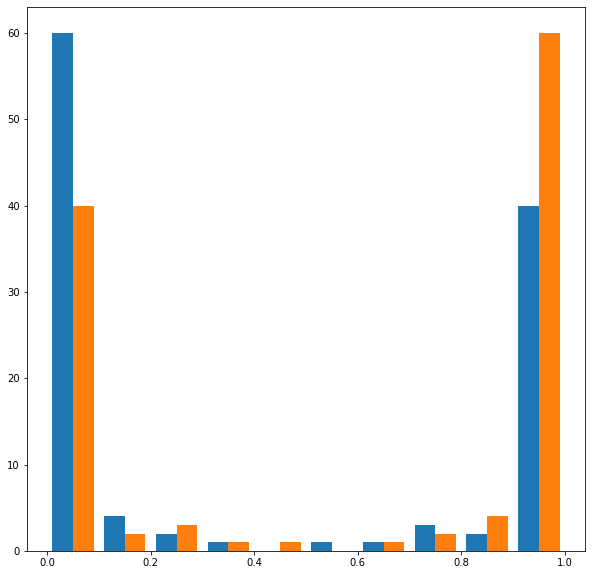

In [54]:
plt.hist(predicciones_probabilidades)

In [56]:
X = X_test.reset_index().copy()
X["objetivo"] = y_test.tolist()
X["prediccion"] = predicciones
X = pd.concat([X, pd.DataFrame(predicciones_probabilidades)], axis=1)
X[["objetivo", "prediccion", 0, 1]].head(20)

,objetivo,prediccion,0,1
0,0,0,1.000000,3.915757e-07
1,0,0,0.999999,1.271511e-06
2,1,1,0.001865,9.981353e-01
3,1,1,0.016507,9.834926e-01
4,1,1,0.000648,9.993521e-01
5,0,0,1.000000,9.156898e-09
6,1,1,0.057219,9.427813e-01
7,0,0,0.999566,4.342293e-04
8,1,1,0.017651,9.823489e-01
9,1,1,0.004641,9.953592e-01
